In [74]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# Importing Train and Test files

In [75]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [76]:
combine=[train_df,test_df] 

In [77]:
print('Number of rows and columns in train data set:', 
      train_df.shape )

Number of rows and columns in train data set: (103904, 24)


In [78]:
print('Number of rows and columns in test data set:', 
      test_df.shape )

Number of rows and columns in train data set: (25976, 24)


In [79]:
#We will Only use train data set for exploratory analysis 

In [80]:
train_df.head(10)

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   
5  111157  Female     Loyal Customer   26  Personal Travel       Eco   
6   82113    Male     Loyal Customer   47  Personal Travel       Eco   
7   96462  Female     Loyal Customer   52  Business travel  Business   
8   79485  Female     Loyal Customer   41  Business travel  Business   
9   65725    Male  disloyal Customer   20  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   
5             1180                      3                                  4   
6             1276                      2                                  4   
7             2035                      4                                  3   
8              853                      1                                  2   
9             1061                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   
5                       2  ...                       1                 3   
6                       2  ...                       2                 3   
7                       4  ...                       5                 5   
8                       2  ...                       1                 1   
9                       3  ...                       2                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   
5                 4                 4                4                 4   
6                 3                 4                3                 5   
7                 5                 5                4                 5   
8                 2                 1                4                 1   
9                 3                 4                4                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   
5            1                           0                       0.0   
6            2                           9                      23.0   
7            4                           4                       0.0   
8          

In [81]:
np.round(train_df.describe(), decimals=2)

id        Age  Flight Distance  Inflight wifi service  \
count  103904.00  103904.00        103904.00              103904.00   
mean    64924.21      39.38          1189.45                   2.73   
std     37463.81      15.11           997.15                   1.33   
min         1.00       7.00            31.00                   0.00   
25%     32533.75      27.00           414.00                   2.00   
50%     64856.50      40.00           843.00                   3.00   
75%     97368.25      51.00          1743.00                   4.00   
max    129880.00      85.00          4983.00                   5.00   

       Departure/Arrival time convenient  Ease of Online booking  \
count                          103904.00               103904.00   
mean                                3.06                    2.76   
std                                 1.53                    1.40   
min                                 0.00                    0.00   
25%                                 2.00                    2.00   
50%                                 3.00                    3.00   
75%                                 4.00                    4.00   
max                                 5.00                    5.00   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count      103904.00       103904.00        103904.00     103904.00   
mean            2.98            3.20             3.25          3.44   
std             1.28            1.33             1.35          1.32   
min             0.00            0.00             0.00          0.00   
25%             2.00            2.00             2.00          2.00   
50%             3.00            3.00             3.00          4.00   
75%             4.00            4.00             4.00          5.00   
max             5.00            5.00             5.00          5.00   

       Inflight entertainment  On-board service  Leg room service  \
count               103904.00         103904.00         103904.00   
mean                     3.36              3.38              3.35   
std                      1.33              1.29              1.32   
min                      0.00              0.00              0.00   
25%                      2.00              2.00              2.00   
50%                      4.00              4.00              4.00   
75%                      4.00              4.00              4.00   
max                      5.00              5.00              5.00   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
count         103904.00        103904.00         103904.00    103904.00   
mean               3.63             3.30              3.64         3.29   
std                1.18             1.27              1.18         1.31   
min                1.00             0.00              0.00         0.00   
25%                3.00             3.00              3.00         2.00   
50%                4.00             3.00              4.00         3.00   
75%                5.00             4.00              5.00         4.00   
max                5.00             5.00              5.00         5.00   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                   103904.00                 103594.00  
mean                        14.82                     15.18  
std                         38.23                     38.70  
min                          0.00                      0.00  
25%                          0.00                      0.00  
50%                          0.00                      0.00  
75%                         12.00                     13.00  
max                       1592.00                   1584.00

# Data Preprocessing 

In [82]:
print('Original column titles:')
train_df.columns

Original column titles:


Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [83]:
for d in combine:
    d.columns = [s.strip().replace(' ', '_') for s in d.columns]
print('Modified column titles with no space and one word for titles:')
train_df.columns
   

Modified column titles with no space and one word for titles:


Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [84]:
test_df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [85]:
train_df.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

In [86]:
for d in combine:
    
    d.Gender = d.Gender.astype('category')
    print(' ')
    print('Category levels and changed variable type:')
    print(d.Gender.cat.categories)  
    print(d.Gender.dtype) 

 
Category levels and changed variable type:
Index(['Female', 'Male'], dtype='object')
category
 
Category levels and changed variable type:
Index(['Female', 'Male'], dtype='object')
category


In [87]:
for d in combine:
    
    d.Customer_Type = d.Customer_Type.astype('category')
    print(' ')
    print('Category levels and changed variable type:')
    print(d.Customer_Type.cat.categories)  
    print(d.Customer_Type.dtype) 

 
Category levels and changed variable type:
Index(['Loyal Customer', 'disloyal Customer'], dtype='object')
category
 
Category levels and changed variable type:
Index(['Loyal Customer', 'disloyal Customer'], dtype='object')
category


In [88]:
for d in combine:
    
    d.Type_of_Travel  = d.Type_of_Travel.astype('category')
    print(' ')
    print('Category levels and changed variable type:')
    print(d.Type_of_Travel.cat.categories)  
    print(d.Type_of_Travel.dtype) 

 
Category levels and changed variable type:
Index(['Business travel', 'Personal Travel'], dtype='object')
category
 
Category levels and changed variable type:
Index(['Business travel', 'Personal Travel'], dtype='object')
category


In [89]:
for d in combine:
    
    d.Class  = d.Class.astype('category')
    print(' ')
    print('Category levels and changed variable type:')
    print(d.Class.cat.categories)  
    print(d.Class.dtype) 

 
Category levels and changed variable type:
Index(['Business', 'Eco', 'Eco Plus'], dtype='object')
category
 
Category levels and changed variable type:
Index(['Business', 'Eco', 'Eco Plus'], dtype='object')
category


In [90]:
for d in combine:
    
    d.satisfaction  = d.satisfaction.astype('category')
    print(' ')
    print('Category levels and changed variable type:')
    print(d.satisfaction.cat.categories)  
    print(d.satisfaction.dtype) 

 
Category levels and changed variable type:
Index(['neutral or dissatisfied', 'satisfied'], dtype='object')
category
 
Category levels and changed variable type:
Index(['neutral or dissatisfied', 'satisfied'], dtype='object')
category


In [91]:
train_df = pd.get_dummies(train_df, prefix_sep='_', 
                            drop_first=True)

In [92]:
test_df = pd.get_dummies(test_df, prefix_sep='_', 
                            drop_first=True)

In [93]:
train_df.dtypes

id                                     int64
Age                                    int64
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
Gender_Male                            uint8
Customer_Type_disloyal Customer        uint8
Type_of_Travel_Personal Travel         uint8
Class_Eco 

In [94]:
test_df.dtypes

id                                     int64
Age                                    int64
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
Gender_Male                            uint8
Customer_Type_disloyal Customer        uint8
Type_of_Travel_Personal Travel         uint8
Class_Eco 

In [95]:
train_df.isnull().sum()

id                                     0
Age                                    0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
Gender_Male                            0
Customer_Type_disloyal Customer        0
Type_of_Travel_Personal Travel         0
Class_Eco                              0
Class_Eco Plus                         0
satisfaction_sat

In [96]:
test_df.isnull().sum()

id                                    0
Age                                   0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
Gender_Male                           0
Customer_Type_disloyal Customer       0
Type_of_Travel_Personal Travel        0
Class_Eco                             0
Class_Eco Plus                        0
satisfaction_satisfied                0


In [97]:
train_df.dropna(axis=0,inplace=True)
test_df.dropna(axis=0,inplace=True)

In [98]:
train_df.isnull().sum()

id                                   0
Age                                  0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
Gender_Male                          0
Customer_Type_disloyal Customer      0
Type_of_Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus                       0
satisfaction_satisfied               0
dtype: int64

In [99]:
test_df.isnull().sum()

id                                   0
Age                                  0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
Gender_Male                          0
Customer_Type_disloyal Customer      0
Type_of_Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus                       0
satisfaction_satisfied               0
dtype: int64

In [100]:
print('Number of rows and columns in train data set after null value removal:', 
      train_df.shape )

Number of rows and columns in train data set after null value removal: (103594, 25)


In [101]:
print('Number of rows and columns in test data set after null value removal:', 
      test_df.shape )

Number of rows and columns in test data set after null value removal: (25893, 25)


In [102]:
train_df.corr()

id       Age  Flight_Distance  \
id                                 1.000000  0.022929         0.095184   
Age                                0.022929  1.000000         0.099838   
Flight_Distance                    0.095184  0.099838         1.000000   
Inflight_wifi_service             -0.021338  0.017470         0.007050   
Departure/Arrival_time_convenient -0.001714  0.038038        -0.019908   
Ease_of_Online_booking             0.014119  0.024461         0.065697   
Gate_location                     -0.000427 -0.001558         0.004732   
Food_and_drink                     0.001254  0.022920         0.056957   
Online_boarding                    0.055394  0.208681         0.215191   
Seat_comfort                       0.053091  0.160302         0.157517   
Inflight_entertainment             0.002592  0.076380         0.128645   
On-board_service                   0.055255  0.057123         0.109540   
Leg_room_service                   0.044459  0.040498         0.133839   
Baggage_handling                   0.075134 -0.047619         0.063222   
Checkin_service                    0.079346  0.035003         0.073224   
Inflight_service                   0.079468 -0.049899         0.057430   
Cleanliness                        0.025313  0.053493         0.093121   
Departure_Delay_in_Minutes        -0.019321 -0.010150         0.001906   
Arrival_Delay_in_Minutes          -0.037254 -0.012147        -0.002426   
Gender_Male                       -0.000301  0.008921         0.006079   
Customer_Type_disloyal Customer    0.000031 -0.281821        -0.225363   
Type_of_Travel_Personal Travel     0.000576 -0.048593        -0.267642   
Class_Eco                         -0.080026 -0.132656        -0.404763   
Class_Eco Plus                    -0.048253 -0.013339        -0.123778   
satisfaction_satisfied             0.013680  0.137040         0.298915   

                                   Inflight_wifi_service  \
id                                             -0.021338   
Age                                             0.017470   
Flight_Distance                                 0.007050   
Inflight_wifi_service                           1.000000   
Departure/Arrival_time_convenient               0.343758   
Ease_of_Online_booking                          0.715848   
Gate_location                                   0.336127   
Food_and_drink                                  0.134603   
Online_boarding                                 0.457002   
Seat_comfort                                    0.122617   
Inflight_entertainment                          0.209513   
On-board_service                                0.121484   
Leg_room_service                                0.160485   
Baggage_handling                                0.121060   
Checkin_service                                 0.043178   
Inflight_service                                0.110626   
Cleanliness                                     0.132652   
Departure_Delay_in_Minutes                     -0.017451   
Arrival_Delay_in_Minutes                       -0.019095   
Gender_Male                                     0.008964   
Customer_Type_disloyal Customer                -0.007706   
Type_of_Travel_Personal Travel                 -0.104879   
Class_Eco                                      -0.037065   
Class_Eco Plus                                  0.007988   
satisfaction_satisfied                          0.284163   

                                   Departure/Arrival_time_convenient  \
id                                                         -0.001714   
Age                                                         0.038038   
Flight_Distance                                            -0.019908   
Inflight_wifi_service                                       0.343758   
Departure/Arrival_time_convenient                           1.000000   
Ease_of_Online_booking                                      0.437021   
Gate_location                                      

In [103]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary

no display found. Using non-interactive Agg backend


In [104]:
train_df.columns

Index(['id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'Gender_Male', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'satisfaction_satisfied'],
      dtype='object')

In [105]:
predictors = ['id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']
outcome = 'satisfaction_satisfied'

In [106]:
X = train_df[predictors]
y = train_df[outcome]
Xt=test_df[predictors]
yt=test_df[outcome]

# Decision Tree with (max_depth=6)

In [107]:
ClassTree = DecisionTreeClassifier(max_depth=6, 
        min_impurity_decrease=0.001, min_samples_split=10)
ClassTree.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_split=10)

Classification Tree with  Parameters


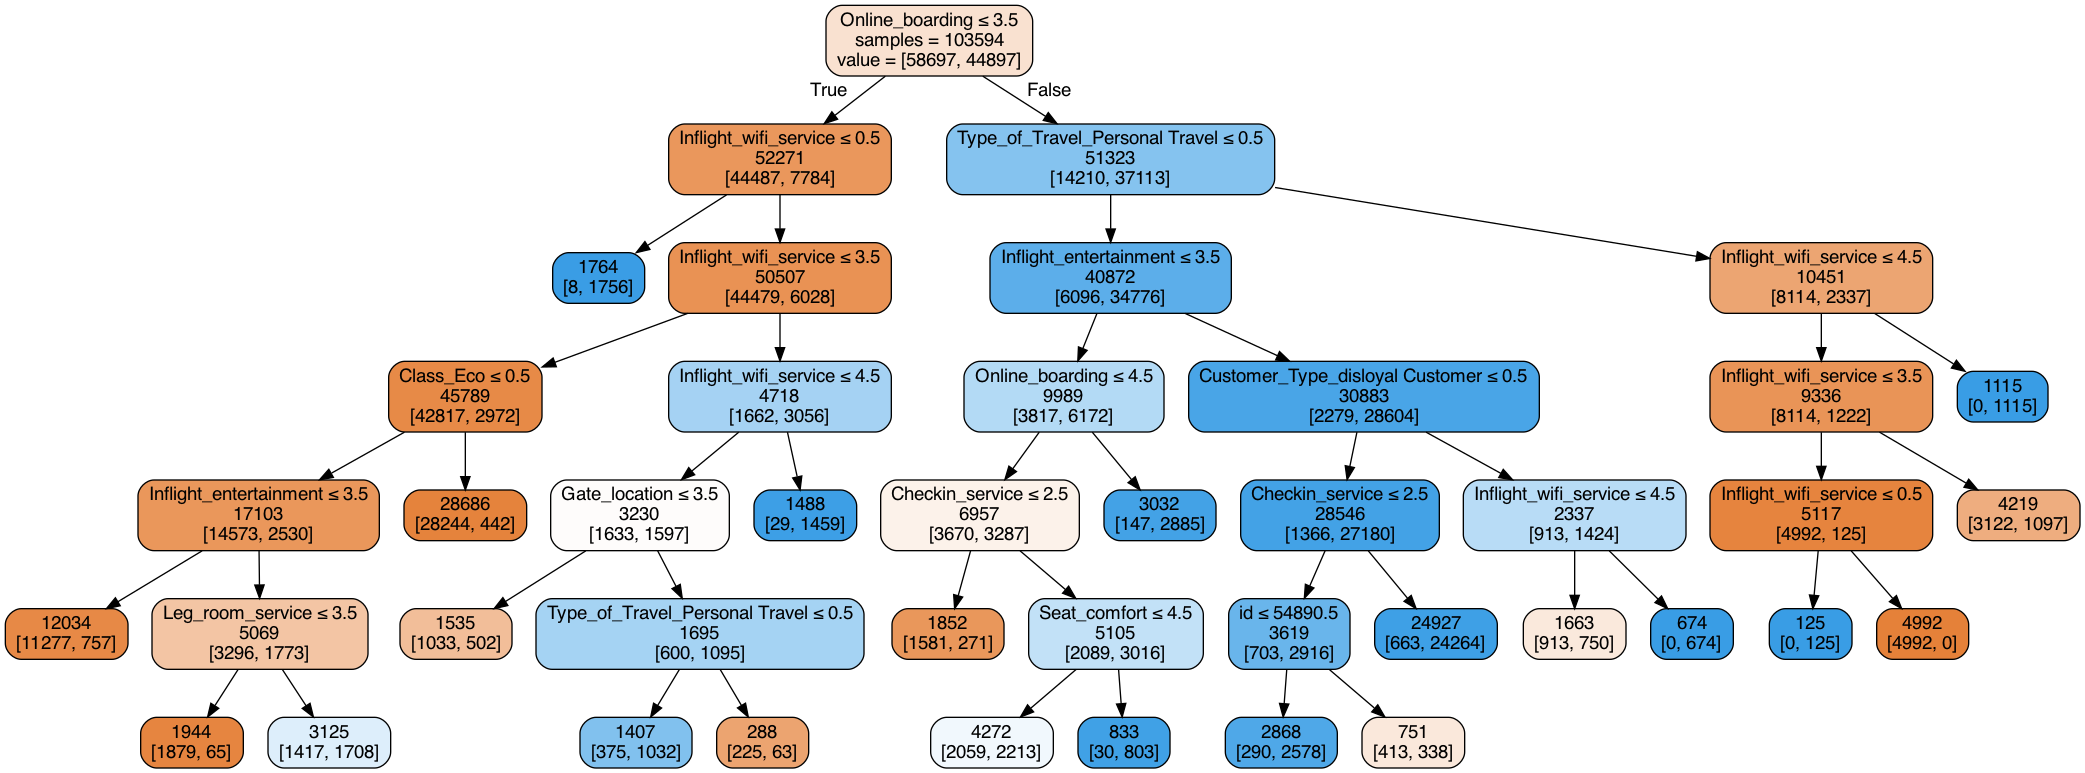

In [108]:
print('Classification Tree with  Parameters')
plotDecisionTree(ClassTree, feature_names=X.columns)

In [109]:
print("Training Data Summary with Decision tree having max_depth=6")
classificationSummary(y, ClassTree.predict(X))

Training Data Summary with Decision tree having max_depth=6
Confusion Matrix (Accuracy 0.9102)

       Prediction
Actual     0     1
     0 53679  5018
     1  4285 40612


In [110]:
print("Test Data Summary with Decision tree having max_depth=6")
classificationSummary(yt, ClassTree.predict(Xt))

Test Data Summary with Decision tree having max_depth=6
Confusion Matrix (Accuracy 0.9087)

       Prediction
Actual     0     1
     0 13238  1290
     1  1073 10292


# Best Parameter Decision Tree model with GridSearchCV() 

In [111]:
param_grid = {
    'max_depth': list(range(2, 30)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X,y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.9521
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_split': 22}


Best Classification Tree with Grid Search
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.6523 to fit



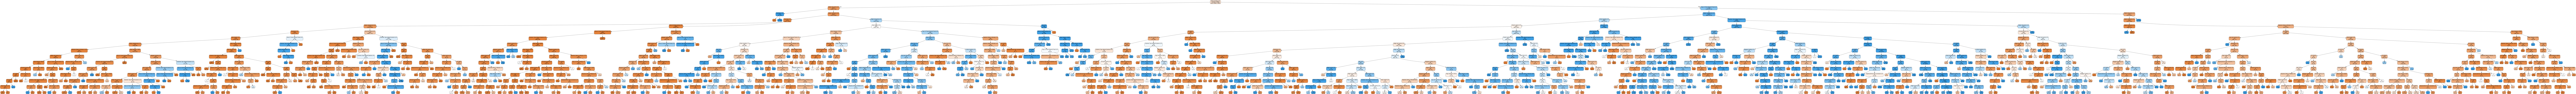

In [112]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=X.columns)

In [113]:
# Indetify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 1807


In [114]:
print('Training Data Summary with BestClassTree')
classificationSummary(y, bestClassTree.predict(X))

Training Data Summary with BestClassTree
Confusion Matrix (Accuracy 0.9660)

       Prediction
Actual     0     1
     0 57493  1204
     1  2319 42578


In [115]:
print('Test Data Summary with BestClassTree')
classificationSummary(yt, bestClassTree.predict(Xt))

Test Data Summary with BestClassTree
Confusion Matrix (Accuracy 0.9535)

       Prediction
Actual     0     1
     0 14045   483
     1   721 10644


# Random Forest 

In [116]:
rf = RandomForestClassifier(n_estimators=500, random_state=10)
rf.fit(X,y)
# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 11619


In [117]:
print('Training Data Summary with Random Forest')
classificationSummary(y, rf.predict(X))

Training Data Summary with Random Forest
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 58697     0
     1     0 44897


In [118]:
print('Test Data Summary with RandomForest')
classificationSummary(yt, rf.predict(Xt))

Test Data Summary with RandomForest
Confusion Matrix (Accuracy 0.9654)

       Prediction
Actual     0     1
     0 14250   278
     1   619 10746


#Boosted Tree

In [119]:
boost = GradientBoostingClassifier(n_estimators=500, random_state=1)
boost.fit(X,y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [120]:
print('Training Data Summary with GradientBoost')
classificationSummary(y, boost.predict(X))

Training Data Summary with GradientBoost
Confusion Matrix (Accuracy 0.9619)

       Prediction
Actual     0     1
     0 57367  1330
     1  2616 42281


In [121]:
print('Test Data Summary with GradientBoost')
classificationSummary(yt, boost.predict(Xt))

Test Data Summary with GradientBoost
Confusion Matrix (Accuracy 0.9596)

       Prediction
Actual     0     1
     0 14149   379
     1   666 10699


# Logistic Regression 

In [122]:
from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

In [123]:
# Using LogisticRegression() function, fit single predictor logistic 
# model for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# Parameter C=1e42 and penalty='l2' lead to ordinal logistic regression. 
# solver='liblinear' is used for automated selection of the best parameters
# of the logistis regression model; recommended for large-scale classification.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(X,y)

LogisticRegression(C=1e+42, solver='liblinear')

In [124]:
print('Parameters ofLogistic Regression Model')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(log_reg.coef_[0], decimals=3)}, 
                   index=X.columns).transpose())

Parameters ofLogistic Regression Model
Intercept: -0.285
               id   Age  Flight_Distance  Inflight_wifi_service  \
Coefficient: -0.0 -0.02              0.0                  0.286   

              Departure/Arrival_time_convenient  Ease_of_Online_booking  \
Coefficient:                             -0.214                   0.011   

              Gate_location  Food_and_drink  Online_boarding  Seat_comfort  \
Coefficient:         -0.178          -0.282            0.543         0.046   

              ...  Baggage_handling  Checkin_service  Inflight_service  \
Coefficient:  ...            -0.096            0.036            -0.123   

              Cleanliness  Departure_Delay_in_Minutes  Gender_Male  \
Coefficient:       -0.039                      -0.005       -0.088   

              Customer_Type_disloyal Customer  Type_of_Travel_Personal Travel  \
Coefficient:                           -0.305                          -0.609   

              Class_Eco  Class_Eco Plus  
Coeff

In [125]:
print('Training Data Summary with Logistic Regression')
classificationSummary(y, log_reg.predict(X))

Training Data Summary with Logistic Regression
Confusion Matrix (Accuracy 0.8264)

       Prediction
Actual     0     1
     0 48539 10158
     1  7830 37067


In [126]:
print('Test Data Summary with Logistic Regression')
classificationSummary(yt, log_reg.predict(Xt))

Test Data Summary with Logistic Regression
Confusion Matrix (Accuracy 0.8296)

       Prediction
Actual     0     1
     0 12087  2441
     1  1971  9394


# Logistic Regression using Backward Elimination

In [127]:
from dmba import backward_elimination, forward_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [130]:

def train_model(variables):
    model = LogisticRegression(max_iter=10000)
    model.fit(X[variables],y)
    return model


def score_model(model, variables):
    return AIC_score(y, model.predict(X[variables]), model)

 
best_model_be, best_variables_be = backward_elimination(X.columns, 
                        train_model, score_model, verbose=True)

print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: id, Age, Flight_Distance, Inflight_wifi_service, Departure/Arrival_time_convenient, Ease_of_Online_booking, Gate_location, Food_and_drink, Online_boarding, Seat_comfort, Inflight_entertainment, On-board_service, Leg_room_service, Baggage_handling, Checkin_service, Inflight_service, Cleanliness, Departure_Delay_in_Minutes, Gender_Male, Customer_Type_disloyal Customer, Type_of_Travel_Personal Travel, Class_Eco, Class_Eco Plus
Start: score=146249.97
Step: score=78477.32, remove id
Step: score=78477.32, remove None

Best Variables from Backward Elimination Algorithm
['Age', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male', 'Customer_Type_disloyal Customer', 'Type_of_Travel

In [131]:
predictors_be = ['Age', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 
                 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 
                 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 
                 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Gender_Male', 
                 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']
outcome = 'satisfaction_satisfied'
X_be = train_df[predictors_be]
Xt_be = test_df[predictors_be]
log_reg_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg_be.fit(X_be,y)



LogisticRegression(C=1e+42, solver='liblinear')

In [132]:
print('Parameters ofLogistic Regression Model with Backward Elimination ')
print('Intercept:', np.round(log_reg_be.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(log_reg_be.coef_[0], decimals=3)}, 
                   index=X_be.columns).transpose())

Parameters ofLogistic Regression Model with Backward Elimination 
Intercept: -5.787
                Age  Flight_Distance  Inflight_wifi_service  \
Coefficient: -0.008             -0.0                  0.395   

              Departure/Arrival_time_convenient  Ease_of_Online_booking  \
Coefficient:                             -0.127                   -0.14   

              Gate_location  Food_and_drink  Online_boarding  Seat_comfort  \
Coefficient:          0.028          -0.024            0.607         0.061   

              Inflight_entertainment  ...  Baggage_handling  Checkin_service  \
Coefficient:                   0.062  ...             0.131            0.324   

              Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
Coefficient:             0.125        0.225                      -0.004   

              Gender_Male  Customer_Type_disloyal Customer  \
Coefficient:        0.043                           -2.055   

              Type_of_Travel_Personal Travel

In [133]:
print('Training Data Summary with Logistic Regression with Backward Elimination')
classificationSummary(y, log_reg_be.predict(X_be))

Training Data Summary with Logistic Regression with Backward Elimination
Confusion Matrix (Accuracy 0.8749)

       Prediction
Actual     0     1
     0 53088  5609
     1  7353 37544


In [134]:
print('Test Data Summary with Logistic Regression with Backward Elimination')
classificationSummary(yt, log_reg_be.predict(Xt_be))

Test Data Summary with Logistic Regression with Backward Elimination
Confusion Matrix (Accuracy 0.8714)

       Prediction
Actual     0     1
     0 13105  1423
     1  1908  9457


# Logistic Regression Using Forward Selection

In [135]:

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression()
    model.fit(X[variables],y)
    return model


def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)


best_model_fs, best_variables_fs = forward_selection(X.columns, 
                    train_model, score_model, verbose=True)

print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: id, Age, Flight_Distance, Inflight_wifi_service, Departure/Arrival_time_convenient, Ease_of_Online_booking, Gate_location, Food_and_drink, Online_boarding, Seat_comfort, Inflight_entertainment, On-board_service, Leg_room_service, Baggage_handling, Checkin_service, Inflight_service, Cleanliness, Departure_Delay_in_Minutes, Gender_Male, Customer_Type_disloyal Customer, Type_of_Travel_Personal Travel, Class_Eco, Class_Eco Plus
Start: score=148524.42, constant
Step: score=133452.41, add Online_boarding
Step: score=101886.32, add Type_of_Travel_Personal Travel
Step: score=99135.22, add Inflight_wifi_service
Step: score=99135.22, add None

Best Variables from Forward Selection Algorithm
['Online_boarding', 'Type_of_Travel_Personal Travel', 'Inflight_wifi_service']


In [136]:
predictors_fs=['Online_boarding', 'Type_of_Travel_Personal Travel', 'Inflight_wifi_service']
outcome = 'satisfaction_satisfied'
X_fs = train_df[predictors_fs]
Xt_fs = test_df[predictors_fs]
log_reg_fs = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg_fs.fit(X_fs,y)


LogisticRegression(C=1e+42, solver='liblinear')

In [137]:
print('Parameters ofLogistic Regression Model with Forward Selection ')
print('Intercept:', np.round(log_reg_fs.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(log_reg_fs.coef_[0], decimals=3)}, 
                   index=X_fs.columns).transpose())

Parameters ofLogistic Regression Model with Forward Selection 
Intercept: -3.373
              Online_boarding  Type_of_Travel_Personal Travel  \
Coefficient:            0.933                          -2.529   

              Inflight_wifi_service  
Coefficient:                  0.187  


In [138]:
print('Training Data Summary with Logistic Regression with Forward Selection')
classificationSummary(y, log_reg_fs.predict(X_fs))

Training Data Summary with Logistic Regression with Forward Selection
Confusion Matrix (Accuracy 0.8476)

       Prediction
Actual     0     1
     0 51838  6859
     1  8933 35964


In [139]:
print('Test Data Summary with Logistic Regression with Forward Selection')
classificationSummary(yt, log_reg_fs.predict(Xt_fs))

Test Data Summary with Logistic Regression with Forward Selection
Confusion Matrix (Accuracy 0.8459)

       Prediction
Actual     0     1
     0 12790  1738
     1  2253  9112


# Neural Network Classifier

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [141]:
scaler = StandardScaler()
C=X.columns
normtrain_X=pd.DataFrame(scaler.fit_transform(X),columns=C)
normtest_X=pd.DataFrame(scaler.fit_transform(Xt),columns=C)

In [142]:
normtrain_X.head(10)

id       Age  Flight_Distance  Inflight_wifi_service  \
0  0.139602 -1.745542        -0.731305               0.203521   
1 -1.598890 -0.951526        -0.956916               0.203521   
2  1.203545 -0.885358        -0.047454              -0.549571   
3 -1.092251 -0.951526        -0.629028              -0.549571   
4  1.451032  1.430521        -0.977973               0.203521   
5  1.233684 -0.885358        -0.009351               0.203521   
6  0.458363  0.504169         0.086910              -0.549571   
7  0.841405  0.835009         0.847971               0.956612   
8  0.388209  0.107161        -0.337238              -1.302662   
9  0.020890 -1.282366        -0.128674               0.203521   

   Departure/Arrival_time_convenient  Ease_of_Online_booking  Gate_location  \
0                           0.616249                0.173716      -1.547312   
1                          -0.695032                0.173716       0.017981   
2                          -0.695032               -0.541118      -0.764666   
3                           1.271890                1.603383       1.583273   
4                          -0.039391                0.173716       0.017981   
5                           0.616249               -0.541118      -1.547312   
6                           0.616249               -0.541118       0.017981   
7                          -0.039391                0.888550       0.800627   
8                          -0.695032               -0.541118      -0.764666   
9                          -0.039391                0.173716       0.800627   

   Food_and_drink  Online_boarding  Seat_comfort  ...  Baggage_handling  \
0        1.352401        -0.185632      1.182991  ...          0.311853   
1       -1.656487        -0.185632     -1.849863  ...         -0.534854   
2        1.352401         1.296479      1.182991  ...          0.311853   
3       -0.904265        -0.926688     -1.091649  ...         -0.534854   
4        0.600179         1.296479      1.182991  ...          0.311853   
5       -1.656487        -0.926688     -1.849863  ...          0.311853   
6       -0.904265        -0.926688     -1.091649  ...          0.311853   
7        1.352401         1.296479      1.182991  ...          1.158561   
8        0.600179        -0.185632     -0.333436  ...         -2.228269   
9       -0.904265        -0.185632     -0.333436  ...          0.311853   

   Checkin_service  Inflight_service  Cleanliness  Departure_Delay_in_Minutes  \
0         0.549773          1.156211     1.305913                    0.268966   
1        -1.821038          0.305580    -1.742432                   -0.360682   
2         0.549773          0.305580     1.305913                   -0.386917   
3        -1.821038          0.305580    -0.980345                   -0.098328   
4        -0.240497         -0.545051    -0.218259                   -0.386917   
5         0.549773          0.305580    -1.742432                   -0.386917   
6        -0.240497          1.156211    -0.980345                   -0.150799   
7         0.549773          1.156211     0.543827                   -0.281976   
8         0.549773         -2.246314    -0.980345                   -0.386917   
9         0.549773         -0.545051    -0.980345                   -0.386917   

   Gender_Male  Customer_Type_disloyal Customer  \
0     1.015154                        -0.472883   
1     1.015154                         2.114687   
2    -0.985072                        -0.472883   
3    -0.985072                        -0.472883   
4     1.015154                        -0.472883   
5    -0.985072                        -0.472883   
6     1.015154                        -0.472883   
7    -0.985072                        -0.472883   
8    -0.985072                        -0.472883   
9     1.015154                         2.114687   

   Type_of_Travel_Personal Travel  Class_Eco  Class_Eco Plus  
0                        1.491414  -0.904105        3.587718  
1                

In [143]:
neural_reg = MLPClassifier(hidden_layer_sizes=(9), max_iter=10000,
                 solver='lbfgs', random_state=1,activation='logistic')
neural_reg.fit(normtrain_X,y)
print('Final Intercepts for Train Data Neural Network Model')
print(neural_reg.intercepts_)
print()
print('Network Weights for Train Data Neural Network Model')
print(neural_reg.coefs_)

Final Intercepts for Train Data Neural Network Model
[array([  0.1557992 ,  -9.17431629, -10.10047725,   1.73348367,
         6.79567145,   3.11161903,   2.31460919, -21.9037209 ,
        -1.14060644]), array([20.34232034])]

Network Weights for Train Data Neural Network Model
[array([[-1.51442327e-01,  2.47810487e-01,  2.67419140e-02,
         1.45889172e-01, -1.11503825e-01,  1.77166179e-01,
        -1.92931120e-01, -1.16380279e-01, -4.93229001e-01],
       [-4.65111800e-02,  4.04002393e-02, -6.72633883e-02,
         3.91526295e-03,  1.65501547e-01, -1.26805520e-01,
         1.54662625e-01, -5.36956176e-02,  3.52083380e+00],
       [-6.46891440e-02,  1.08489960e-01, -2.51962386e-01,
         5.27921419e-02, -8.91408169e-02,  9.92418947e-02,
         1.77840933e-02,  3.13456188e-02, -6.67674301e-01],
       [-1.43086335e+01, -1.73410588e+00,  1.18688017e+01,
        -1.07270544e+00,  2.42695683e-01, -3.48722341e-01,
        -3.22100711e+00, -1.47052010e+01,  1.43148519e+00],
       [-

In [144]:
print('Training Data Summary with Neural Network Classifier')
classificationSummary(y, neural_reg.predict(normtrain_X))

Training Data Summary with Neural Network Classifier
Confusion Matrix (Accuracy 0.9552)

       Prediction
Actual     0     1
     0 57048  1649
     1  2991 41906


In [145]:
print('Testing Data Summary with Neural Network Classifier')
classificationSummary(yt, neural_reg.predict(normtest_X))

Testing Data Summary with Neural Network Classifier
Confusion Matrix (Accuracy 0.9544)

       Prediction
Actual     0     1
     0 14123   405
     1   775 10590


# Neural Network With GridSearch()

In [146]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch_neural = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch_neural.fit(normtrain_X,y)




/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=10000, random_state=1,
                                     solver='lbfgs'),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18,
                                                19]},
             return_train_score=True)

In [147]:
# Display the best score and best parament value.
print(f'Best score:{gridSearch_neural.best_score_:.4f}')
print('Best parameter: ', gridSearch_neural.best_params_)

Best score:0.9606
Best parameter:  {'hidden_layer_sizes': 18}


In [148]:
neural_imp = MLPClassifier(hidden_layer_sizes=(18), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
neural_imp.fit(normtrain_X,y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Improved Neural Network Model')
print(neural_imp.intercepts_)

print()
print('Network Weights for Improved Neural Network Model')
print(neural_imp.coefs_)

Final Intercepts for Improved Neural Network Model
[array([ -1.53965992,  -4.42731494,  -4.44696877,   4.99093936,
         3.03181438,  -1.41564886,   5.74327312,  -4.9143426 ,
         1.41393536,  -5.27322142, -18.68975832,   0.99049632,
        -7.89518732,   0.48063667,  -0.23391539,  -8.22630357,
         5.83551276,  -5.48841799]), array([0.30743566])]

Network Weights for Improved Neural Network Model
[array([[ 3.09450703e-01, -1.80101261e-01,  2.28875034e-01,
         2.58464302e-01,  2.12469983e-01, -2.72223778e-01,
         8.54489765e-02, -1.15167616e-01,  2.16744482e-02,
         1.85300915e-02,  4.27433641e-03,  1.15928389e-01,
         7.15281799e-02, -1.17173173e-01, -2.93511555e-03,
         1.32588169e-01, -5.06754364e-01, -8.11204335e-02],
       [ 5.73857120e+00, -3.92526923e-01,  4.33380228e-01,
         3.51966359e-02, -8.90103375e-02,  4.18404570e+00,
        -3.49688189e-01, -2.21427241e-01,  3.15133647e-01,
         7.46508020e-02, -2.25531146e-02, -2.60974048e

In [149]:
print('Training Data Summary with Improved Neural Network Classifier')
classificationSummary(y, neural_imp.predict(normtrain_X))

Training Data Summary with Improved Neural Network Classifier
Confusion Matrix (Accuracy 0.9639)

       Prediction
Actual     0     1
     0 57425  1272
     1  2471 42426


In [150]:
print('Testing Data Summary with Improved Neural Network Classifier')
classificationSummary(yt, neural_imp.predict(normtest_X))

Testing Data Summary with Improved Neural Network Classifier
Confusion Matrix (Accuracy 0.9606)

       Prediction
Actual     0     1
     0 14162   366
     1   654 10711
